Importing necessary libraries


In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings 
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

Loading the dataset


In [3]:
data = pd.read_csv('Datasets/adult_student_version 1(in).csv')

In [4]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,student_id,lucky_number,hobby_code
0,90.0,?,77053.0,HS-grad,9.0,Widowed,?,Not-in-family,White,NaN,0.0,4356.0,40.0,United-States,<=50K,1,202.0,A
1,82.0,Private,132870.0,HS-grad,9.0,NaN,NaN,Not-in-family,White,Female,0.0,4356.0,18.0,United-States,<=50K,2,535.0,A
2,66.0,?,186061.0,Some-college,10.0,Widowed,?,Unmarried,Black,Female,0.0,NaN,40.0,United-States,<=50K,3,960.0,C
3,54.0,Private,140359.0,7th-8th,4.0,Divorced,Machine-op-inspct,Unmarried,White,Female,NaN,3900.0,40.0,United-States,<=50K,4,370.0,A
4,41.0,Private,264663.0,Some-college,10.0,Separated,Prof-specialty,Own-child,White,Female,0.0,3900.0,40.0,United-States,0,5,206.0,A


In [5]:
df = data.copy()
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,student_id,lucky_number,hobby_code
0,90.0,?,77053.0,HS-grad,9.0,Widowed,?,Not-in-family,White,NaN,0.0,4356.0,40.0,United-States,<=50K,1,202.0,A
1,82.0,Private,132870.0,HS-grad,9.0,NaN,NaN,Not-in-family,White,Female,0.0,4356.0,18.0,United-States,<=50K,2,535.0,A
2,66.0,?,186061.0,Some-college,10.0,Widowed,?,Unmarried,Black,Female,0.0,NaN,40.0,United-States,<=50K,3,960.0,C
3,54.0,Private,140359.0,7th-8th,4.0,Divorced,Machine-op-inspct,Unmarried,White,Female,NaN,3900.0,40.0,United-States,<=50K,4,370.0,A
4,41.0,Private,264663.0,Some-college,10.0,Separated,Prof-specialty,Own-child,White,Female,0.0,3900.0,40.0,United-States,0,5,206.0,A


In [6]:
df.shape

(33212, 18)

In [7]:
df.columns= df.columns.str.replace('.','_')
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income', 'student_id', 'lucky_number', 'hobby_code'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33212 entries, 0 to 33211
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             31544 non-null  float64
 1   workclass       31554 non-null  object 
 2   fnlwgt          31560 non-null  float64
 3   education       31545 non-null  object 
 4   education_num   31549 non-null  float64
 5   marital_status  31559 non-null  object 
 6   occupation      31541 non-null  object 
 7   relationship    31554 non-null  object 
 8   race            31551 non-null  object 
 9   sex             31561 non-null  object 
 10  capital_gain    31551 non-null  float64
 11  capital_loss    31544 non-null  float64
 12  hours_per_week  31556 non-null  float64
 13  native_country  31549 non-null  object 
 14  income          33212 non-null  object 
 15  student_id      33212 non-null  int64  
 16  lucky_number    31547 non-null  float64
 17  hobby_code      31545 non-null 

In [9]:
df.income.value_counts()

income
<=50K    17668
0         7548
>50K      5609
1         2387
Name: count, dtype: int64

In [10]:
df.isnull().sum()

age               1668
workclass         1658
fnlwgt            1652
education         1667
education_num     1663
marital_status    1653
occupation        1671
relationship      1658
race              1661
sex               1651
capital_gain      1661
capital_loss      1668
hours_per_week    1656
native_country    1663
income               0
student_id           0
lucky_number      1665
hobby_code        1667
dtype: int64

Handling Missing Values

In [ ]:
#Removing the student_id as it is just an identifier
df.drop('student_id', axis=1, inplace=True)
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,lucky_number,hobby_code
0,90.0,?,77053.0,HS-grad,9.0,Widowed,?,Not-in-family,White,NaN,0.0,4356.0,40.0,United-States,<=50K,202.0,A
1,82.0,Private,132870.0,HS-grad,9.0,NaN,NaN,Not-in-family,White,Female,0.0,4356.0,18.0,United-States,<=50K,535.0,A
2,66.0,?,186061.0,Some-college,10.0,Widowed,?,Unmarried,Black,Female,0.0,NaN,40.0,United-States,<=50K,960.0,C
3,54.0,Private,140359.0,7th-8th,4.0,Divorced,Machine-op-inspct,Unmarried,White,Female,NaN,3900.0,40.0,United-States,<=50K,370.0,A
4,41.0,Private,264663.0,Some-college,10.0,Separated,Prof-specialty,Own-child,White,Female,0.0,3900.0,40.0,United-States,0,206.0,A


In [ ]:
# For numerical columns we will fill it with median

numerical_cols = df.select_dtypes(include=[np.number]).columns
numerical_cols

Index(['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week', 'lucky_number'],
      dtype='object')

In [16]:
#filling it with medians

for col in numerical_cols:
    if col != 'income':
        df[col].fillna(df[col].median(),inplace=True)


In [17]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,lucky_number,hobby_code
0,90.0,?,77053.0,HS-grad,9.0,Widowed,?,Not-in-family,White,NaN,0.0,4356.0,40.0,United-States,<=50K,202.0,A
1,82.0,Private,132870.0,HS-grad,9.0,NaN,NaN,Not-in-family,White,Female,0.0,4356.0,18.0,United-States,<=50K,535.0,A
2,66.0,?,186061.0,Some-college,10.0,Widowed,?,Unmarried,Black,Female,0.0,0.0,40.0,United-States,<=50K,960.0,C
3,54.0,Private,140359.0,7th-8th,4.0,Divorced,Machine-op-inspct,Unmarried,White,Female,0.0,3900.0,40.0,United-States,<=50K,370.0,A
4,41.0,Private,264663.0,Some-college,10.0,Separated,Prof-specialty,Own-child,White,Female,0.0,3900.0,40.0,United-States,0,206.0,A


Checking if there is still any null value for the numerical columns or not

In [18]:
df.isnull().sum()

age                  0
workclass         1658
fnlwgt               0
education         1667
education_num        0
marital_status    1653
occupation        1671
relationship      1658
race              1661
sex               1651
capital_gain         0
capital_loss         0
hours_per_week       0
native_country    1663
income               0
lucky_number         0
hobby_code        1667
dtype: int64

In [ ]:
#For categorical columns we will fill it with mode
categorical_columns = df.select_dtypes(include=['object']).columns
categorical_columns

Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country', 'income',
       'hobby_code'],
      dtype='object')

In [20]:
for col in categorical_columns:
    if col!='income':
        df[col].fillna(df[col].mode()[0], inplace =True)

Checking again if there is any null value still left in the categorical column

In [21]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
lucky_number      0
hobby_code        0
dtype: int64

In [23]:
df.sample(10)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,lucky_number,hobby_code
25828,37.0,Self-emp-inc,178218.5,Bachelors,13.0,Never-married,Prof-specialty,Own-child,White,Male,0.0,0.0,40.0,United-States,<=50K,349.0,A
7923,36.0,Private,99270.0,HS-grad,9.0,Married-civ-spouse,Prof-specialty,Wife,White,Female,0.0,0.0,40.0,United-States,0,178.0,A
22090,35.0,Private,240467.0,HS-grad,9.0,Married-spouse-absent,Adm-clerical,Unmarried,Black,Female,0.0,0.0,40.0,United-States,<=50K,211.0,A
31565,59.0,Self-emp-not-inc,114760.0,Some-college,10.0,Married-civ-spouse,Craft-repair,Husband,White,Male,0.0,0.0,20.0,United-States,1,448.0,C
23609,27.0,Private,209801.0,Some-college,10.0,Never-married,Adm-clerical,Not-in-family,White,Female,0.0,0.0,45.0,?,<=50K,759.0,A
24183,88.0,Private,68539.0,Some-college,10.0,Divorced,Adm-clerical,Husband,White,Female,0.0,0.0,40.0,United-States,0,507.0,A
4294,31.0,Private,309974.0,Bachelors,13.0,Separated,Sales,Own-child,Black,Female,0.0,0.0,40.0,United-States,<=50K,586.0,B
11753,42.0,Private,183479.0,Assoc-voc,11.0,Married-civ-spouse,Sales,Husband,White,Male,0.0,0.0,40.0,United-States,1,224.0,A
1275,39.0,?,103986.0,HS-grad,9.0,Never-married,?,Not-in-family,White,Male,0.0,1590.0,40.0,United-States,0,687.0,B
20132,19.0,Private,46400.0,Some-college,10.0,Never-married,?,Not-in-family,White,Female,0.0,0.0,24.0,United-States,<=50K,643.0,C


Now check for the values available for each column

In [24]:
df.workclass.value_counts()

workclass
Private             23659
Self-emp-not-inc     2438
Local-gov            2022
?                    1797
State-gov            1263
Self-emp-inc         1070
Federal-gov           942
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [31]:
# Check what are the unique values each categorical columns have
for col in categorical_columns:
    if col!='income':
        print(df[col].unique())


['?' 'Private' 'State-gov' 'Federal-gov' 'Self-emp-not-inc' 'Self-emp-inc'
 'Local-gov' 'Without-pay' 'Never-worked']
['HS-grad' 'Some-college' '7th-8th' '10th' 'Doctorate' 'Prof-school'
 'Bachelors' 'Masters' '11th' 'Assoc-acdm' 'Assoc-voc' '1st-4th' '5th-6th'
 '12th' '9th' 'Preschool']
['Widowed' 'Married-civ-spouse' 'Divorced' 'Separated' 'Never-married'
 'Married-spouse-absent' 'Married-AF-spouse']
['?' 'Prof-specialty' 'Machine-op-inspct' 'Other-service' 'Adm-clerical'
 'Craft-repair' 'Exec-managerial' 'Transport-moving' 'Handlers-cleaners'
 'Sales' 'Farming-fishing' 'Tech-support' 'Protective-serv' 'Armed-Forces'
 'Priv-house-serv']
['Not-in-family' 'Unmarried' 'Own-child' 'Other-relative' 'Husband' 'Wife']
['White' 'Black' 'Asian-Pac-Islander' 'Other' 'Amer-Indian-Eskimo']
['Male' 'Female']
['United-States' '?' 'Mexico' 'Greece' 'Vietnam' 'China' 'Taiwan' 'India'
 'Philippines' 'Trinadad&Tobago' 'Canada' 'South' 'Holand-Netherlands'
 'Puerto-Rico' 'Poland' 'Iran' 'England' 'Germ

Here we can see that workclass, occupation and native country have '?' in some of the rows, our model will not be able to understand it, so we have to handle this first.

In [32]:
df['workclass'] = df['workclass'].replace('?', np.nan)


In [33]:
df['workclass'].isnull().sum()

np.int64(1797)

In [34]:
df['education'].unique()

array(['HS-grad', 'Some-college', '7th-8th', '10th', 'Doctorate',
       'Prof-school', 'Bachelors', 'Masters', '11th', 'Assoc-acdm',
       'Assoc-voc', '1st-4th', '5th-6th', '12th', '9th', 'Preschool'],
      dtype=object)

In [35]:
df['marital_status'].unique()

array(['Widowed', 'Married-civ-spouse', 'Divorced', 'Separated',
       'Never-married', 'Married-spouse-absent', 'Married-AF-spouse'],
      dtype=object)

In [ ]:
df['occupation'].unique()


array(['?', 'Prof-specialty', 'Machine-op-inspct', 'Other-service',
       'Adm-clerical', 'Craft-repair', 'Exec-managerial',
       'Transport-moving', 'Handlers-cleaners', 'Sales',
       'Farming-fishing', 'Tech-support', 'Protective-serv',
       'Armed-Forces', 'Priv-house-serv'], dtype=object)

In [ ]:
df['occupation']=df['occupation'].replace('?',np.nan)
df['occupation'].unique()


array([nan, 'Prof-specialty', 'Machine-op-inspct', 'Other-service',
       'Adm-clerical', 'Craft-repair', 'Exec-managerial',
       'Transport-moving', 'Handlers-cleaners', 'Sales',
       'Farming-fishing', 'Tech-support', 'Protective-serv',
       'Armed-Forces', 'Priv-house-serv'], dtype=object)

In [38]:
df['relationship'].unique()

array(['Not-in-family', 'Unmarried', 'Own-child', 'Other-relative',
       'Husband', 'Wife'], dtype=object)

In [44]:
df['race'].unique()

array(['White', 'Black', 'Asian-Pac-Islander', 'Other',
       'Amer-Indian-Eskimo'], dtype=object)

In [45]:
df['sex'].unique()

array(['Male', 'Female'], dtype=object)

In [47]:
df['native_country'].unique()
df['native_country']=df['native_country'].replace('?',np.nan)
df['native_country'].unique()

array(['United-States', nan, 'Mexico', 'Greece', 'Vietnam', 'China',
       'Taiwan', 'India', 'Philippines', 'Trinadad&Tobago', 'Canada',
       'South', 'Holand-Netherlands', 'Puerto-Rico', 'Poland', 'Iran',
       'England', 'Germany', 'Italy', 'Japan', 'Honduras', 'Cuba',
       'Ireland', 'Cambodia', 'Peru', 'Nicaragua', 'Dominican-Republic',
       'Haiti', 'El-Salvador', 'Hungary', 'Columbia', 'Guatemala',
       'Jamaica', 'Ecuador', 'France', 'Yugoslavia', 'Scotland',
       'Portugal', 'Laos', 'Thailand', 'Outlying-US(Guam-USVI-etc)',
       'Hong'], dtype=object)

In [90]:
#After imputing every '?' with nan lets check how many null values we have for each column

In [49]:
df.isnull().sum()

age                  0
workclass         1797
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1794
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     565
income               0
lucky_number         0
hobby_code           0
dtype: int64

Imputing each of the null values with mode as they are categorical columns

In [50]:
df['workclass'].fillna(df['workclass'].mode()[0],inplace=True)
df.isnull().sum()

age                  0
workclass            0
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1794
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     565
income               0
lucky_number         0
hobby_code           0
dtype: int64

In [51]:
df['occupation'].fillna(df['occupation'].mode()[0],inplace=True)

In [52]:
df['native_country'].fillna(df['native_country'].mode()[0], inplace=True)

Again checking if there is any any column with missing values that is still left

In [53]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
lucky_number      0
hobby_code        0
dtype: int64

Now we have handled the missing values in our dataset.

In [54]:
df['income'].isnull().sum()

np.int64(0)

Convert Income Target to Binary

In [91]:
#As there were four classes of the target variable 'income' lets convert these into two classes where 0 will represent low income
#and 1 will represent high income 

In [55]:
def convert_income(value):
    if value == '<=50K' or value =='0' or value==0:
        return 0
    elif value == '>50K' or value =='1' or value ==1:
        return 1
    else:
        return value
    
df['income'] = df['income'].apply(convert_income)

In [58]:
df['income'].value_counts()

income
0    25216
1     7996
Name: count, dtype: int64

Lets divide the dataset into two parts, one will only have the independent variables the other will have the dependent variable.

In [61]:
X = df.drop('income', axis=1)  # All columns except income
y = df['income']               # Just the income column

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"Feature columns: {X.columns.tolist()}")
print(f"Target columns : {y.tolist()}")

Features shape: (33212, 16)
Target shape: (33212,)
Feature columns: ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'lucky_number', 'hobby_code']
Target columns : [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

Visualizing and finding out the outliers

Numerical columns: ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week', 'lucky_number']


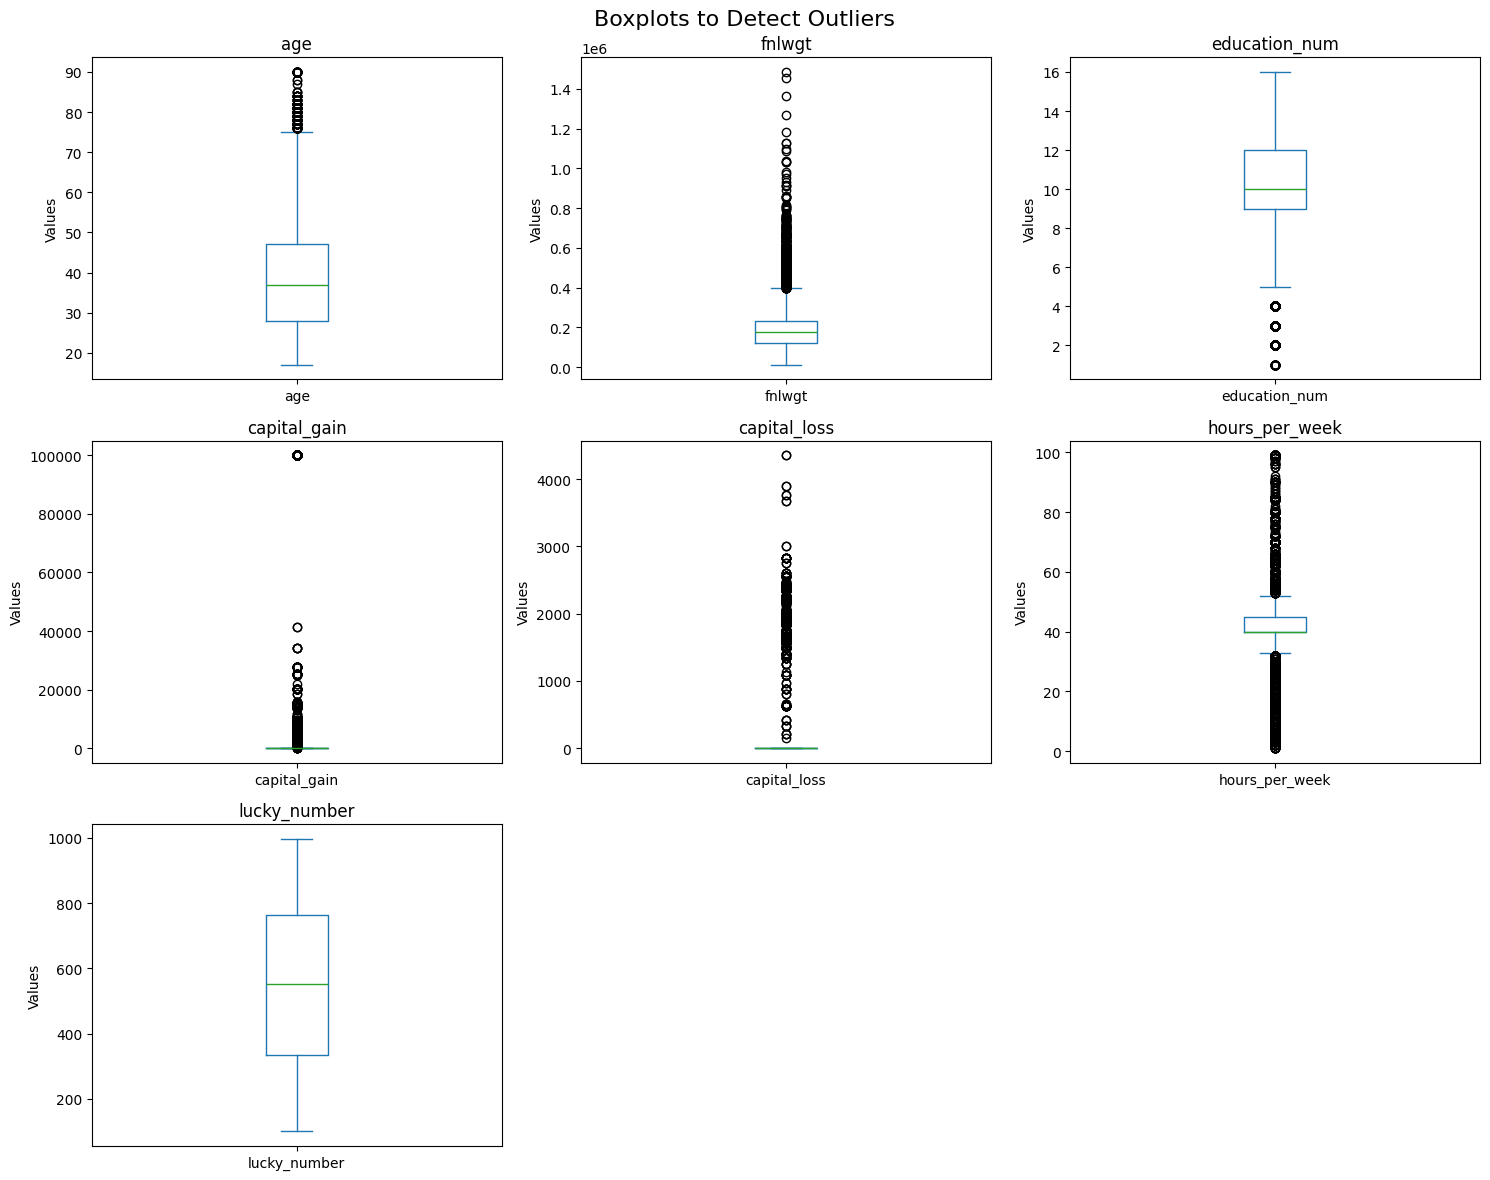


Outlier detection using IQR method:
age: 231 outliers out of 33212 samples
  Range: 17.00 to 90.00
  Outlier bounds: < -0.50 or > 75.50
fnlwgt: 1219 outliers out of 33212 samples
  Range: 12285.00 to 1484705.00
  Outlier bounds: < -46815.00 or > 399227.00
education_num: 1159 outliers out of 33212 samples
  Range: 1.00 to 16.00
  Outlier bounds: < 4.50 or > 16.50
capital_gain: 2631 outliers out of 33212 samples
  Range: 0.00 to 99999.00
  Outlier bounds: < 0.00 or > 0.00
capital_loss: 1472 outliers out of 33212 samples
  Range: 0.00 to 4356.00
  Outlier bounds: < 0.00 or > 0.00
hours_per_week: 8729 outliers out of 33212 samples
  Range: 1.00 to 99.00
  Outlier bounds: < 32.50 or > 52.50
lucky_number: 0 outliers out of 33212 samples


In [63]:
import matplotlib.pyplot as plt

# Identify numerical columns
numerical_cols = X.select_dtypes(include=[np.number]).columns.tolist()
print(f"Numerical columns: {numerical_cols}")

# Create boxplots to visualize outliers
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
fig.suptitle('Boxplots to Detect Outliers', fontsize=16)
axes = axes.ravel()  # Flatten the array for easy indexing

for i, col in enumerate(numerical_cols[:9]):  # Plot first 9 numerical columns
    X[col].plot(kind='box', ax=axes[i], title=col)
    axes[i].set_ylabel('Values')

# Hide any unused subplots
for j in range(len(numerical_cols), 9):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

# Now check outliers using IQR method with numbers
print("\nOutlier detection using IQR method:")
for col in numerical_cols:
    Q1 = X[col].quantile(0.25)
    Q3 = X[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = X[(X[col] < lower_bound) | (X[col] > upper_bound)][col]
    print(f"{col}: {len(outliers)} outliers out of {len(X)} samples")
    if len(outliers) > 0:
        print(f"  Range: {X[col].min():.2f} to {X[col].max():.2f}")
        print(f"  Outlier bounds: < {lower_bound:.2f} or > {upper_bound:.2f}")

In [64]:
# Create a copy to handle outliers
X_outliers_handled = X.copy()

# Handle outliers using capping (Winsorization)
outlier_cols = ['age', 'fnlwgt', 'education_num', 'hours_per_week']  # Skip capital_gain/loss for now

print("Handling outliers by capping at 5th and 95th percentiles...")

for col in outlier_cols:
    lower_cap = X[col].quantile(0.05)  # 5th percentile
    upper_cap = X[col].quantile(0.95)  # 95th percentile
    
    print(f"{col}: Capping values < {lower_cap:.2f} and > {upper_cap:.2f}")
    
    # Cap the values
    X_outliers_handled[col] = X_outliers_handled[col].clip(lower=lower_cap, upper=upper_cap)

print("\nOutlier handling completed!")
print("Capital_gain and capital_loss left as-is (zeros are normal)")

Handling outliers by capping at 5th and 95th percentiles...
age: Capping values < 20.00 and > 63.00
fnlwgt: Capping values < 40843.85 and > 376064.30
education_num: Capping values < 6.00 and > 14.00
hours_per_week: Capping values < 20.00 and > 60.00

Outlier handling completed!
Capital_gain and capital_loss left as-is (zeros are normal)


In [65]:
# Identify categorical columns
categorical_cols = X_outliers_handled.select_dtypes(include=['object']).columns.tolist()
print(f"Categorical columns to encode: {categorical_cols}")

# Create a copy for encoding
X_encoded = X_outliers_handled.copy()

# Use Label Encoder for each categorical column
label_encoders = {}  # Store encoders to use later for new predictions

print("\nEncoding categorical features...")
for col in categorical_cols:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X_encoded[col].astype(str))
    label_encoders[col] = le  # Save the encoder
    
    print(f"{col}: {X_encoded[col].nunique()} unique values after encoding")

# Check the final features
print(f"\nFinal feature shape: {X_encoded.shape}")
print(f"All columns are now numerical: {X_encoded.dtypes}")

# Quick check - no more object types
print(f"\nAny non-numerical columns left? {X_encoded.select_dtypes(include=['object']).shape[1] == 0}")

Categorical columns to encode: ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'hobby_code']

Encoding categorical features...
workclass: 8 unique values after encoding
education: 16 unique values after encoding
marital_status: 7 unique values after encoding
occupation: 14 unique values after encoding
relationship: 6 unique values after encoding
race: 5 unique values after encoding
sex: 2 unique values after encoding
native_country: 41 unique values after encoding
hobby_code: 4 unique values after encoding

Final feature shape: (33212, 16)
All columns are now numerical: age               float64
workclass           int64
fnlwgt            float64
education           int64
education_num     float64
marital_status      int64
occupation          int64
relationship        int64
race                int64
sex                 int64
capital_gain      float64
capital_loss      float64
hours_per_week    float64
native_country      int64

In [66]:
# Split the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y  # This keeps the same proportion of 0s and 1s in both sets
)

print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

print(f"\nTrain target distribution:")
print(y_train.value_counts())
print(f"Train percentages: {y_train.value_counts(normalize=True) * 100}")

print(f"\nTest target distribution:")
print(y_test.value_counts())
print(f"Test percentages: {y_test.value_counts(normalize=True) * 100}")

Training set shape: (26569, 16)
Test set shape: (6643, 16)

Train target distribution:
income
0    20172
1     6397
Name: count, dtype: int64
Train percentages: income
0    75.923068
1    24.076932
Name: proportion, dtype: float64

Test target distribution:
income
0    5044
1    1599
Name: count, dtype: int64
Test percentages: income
0    75.92955
1    24.07045
Name: proportion, dtype: float64


In [67]:
# Create and fit the scaler on training data only
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # Use same scaler, don't fit again

print("Features scaled using StandardScaler")
print(f"Training data shape after scaling: {X_train_scaled.shape}")
print(f"Test data shape after scaling: {X_test_scaled.shape}")

# Quick check - features should now have mean~0 and std~1
print(f"\nSample means after scaling (should be close to 0):")
print(f"First 5 feature means: {X_train_scaled.mean(axis=0)[:5]}")
print(f"\nSample standard deviations (should be close to 1):")
print(f"First 5 feature stds: {X_train_scaled.std(axis=0)[:5]}")

Features scaled using StandardScaler
Training data shape after scaling: (26569, 16)
Test data shape after scaling: (6643, 16)

Sample means after scaling (should be close to 0):
First 5 feature means: [ 1.95226089e-17 -3.85103519e-17 -1.29437572e-16 -1.88272831e-16
 -2.52189318e-16]

Sample standard deviations (should be close to 1):
First 5 feature stds: [1. 1. 1. 1. 1.]


In [80]:
# Create and train Logistic Regression model
lr_model = LogisticRegression(random_state=42, max_iter=1000)

print("Training Logistic Regression model...")
lr_model.fit(X_train_scaled, y_train)

print(" Model training completed!")

# Make predictions on test set
y_pred = lr_model.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\n Test Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")

Training Logistic Regression model...
 Model training completed!

 Test Accuracy: 0.8233 (82.33%)


In [81]:
# Detailed classification report
print(" Detailed Classification Report:")
print(classification_report(y_test, y_pred, target_names=['<=50K', '>50K']))

# Confusion Matrix
print("\n Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

print("\n Confusion Matrix Breakdown:")
print(f"True <=50K, Predicted <=50K: {cm[0,0]} (Correct low income)")
print(f"True <=50K, Predicted >50K:  {cm[0,1]} (Wrong - missed low income)")
print(f"True >50K, Predicted <=50K:  {cm[1,0]} (Wrong - missed high income)")
print(f"True >50K, Predicted >50K:   {cm[1,1]} (Correct high income)")

# Calculate percentages
low_income_accuracy = cm[0,0] / (cm[0,0] + cm[0,1])
high_income_accuracy = cm[1,1] / (cm[1,0] + cm[1,1])

print(f"\n Class-wise Accuracy:")
print(f"Low income (<=50K) accuracy: {low_income_accuracy:.3f} ({low_income_accuracy*100:.1f}%)")
print(f"High income (>50K) accuracy: {high_income_accuracy:.3f} ({high_income_accuracy*100:.1f}%)")

 Detailed Classification Report:
              precision    recall  f1-score   support

       <=50K       0.84      0.95      0.89      5044
        >50K       0.72      0.44      0.54      1599

    accuracy                           0.82      6643
   macro avg       0.78      0.69      0.72      6643
weighted avg       0.81      0.82      0.81      6643


 Confusion Matrix:
[[4767  277]
 [ 897  702]]

 Confusion Matrix Breakdown:
True <=50K, Predicted <=50K: 4767 (Correct low income)
True <=50K, Predicted >50K:  277 (Wrong - missed low income)
True >50K, Predicted <=50K:  897 (Wrong - missed high income)
True >50K, Predicted >50K:   702 (Correct high income)

 Class-wise Accuracy:
Low income (<=50K) accuracy: 0.945 (94.5%)
High income (>50K) accuracy: 0.439 (43.9%)


In [82]:
# Train Logistic Regression with class balancing
print("Training improved Logistic Regression with class balancing...")

# The 'balanced' parameter automatically adjusts weights inversely proportional to class frequencies
lr_balanced = LogisticRegression(
    random_state=42, 
    max_iter=1000,
    class_weight='balanced'  # This is the key improvement!
)

lr_balanced.fit(X_train_scaled, y_train)
print(" Balanced model training completed!")

# Make predictions
y_pred_balanced = lr_balanced.predict(X_test_scaled)

# Calculate accuracy
accuracy_balanced = accuracy_score(y_test, y_pred_balanced)
print(f"\n Balanced Model Accuracy: {accuracy_balanced:.4f} ({accuracy_balanced*100:.2f}%)")

# Compare with original model
print(f" Improvement: {accuracy_balanced - accuracy:.4f} ({(accuracy_balanced - accuracy)*100:.2f} percentage points)")

Training improved Logistic Regression with class balancing...
 Balanced model training completed!

 Balanced Model Accuracy: 0.7673 (76.73%)
 Improvement: -0.0560 (-5.60 percentage points)


In [84]:
# Detailed performance of balanced model
print(" Balanced Model - Detailed Classification Report:")
print(classification_report(y_test, y_pred_balanced, target_names=['<=50K', '>50K']))

print("\n Balanced Model - Confusion Matrix:")
cm_balanced = confusion_matrix(y_test, y_pred_balanced)
print(cm_balanced)

print("\n Balanced Model Breakdown:")
print(f"True <=50K, Predicted <=50K: {cm_balanced[0,0]} (Correct low income)")
print(f"True <=50K, Predicted >50K:  {cm_balanced[0,1]} (Wrong - missed low income)")
print(f"True >50K, Predicted <=50K:  {cm_balanced[1,0]} (Wrong - missed high income)")
print(f"True >50K, Predicted >50K:   {cm_balanced[1,1]} (Correct high income)")

# Class-wise accuracy
low_income_acc_balanced = cm_balanced[0,0] / (cm_balanced[0,0] + cm_balanced[0,1])
high_income_acc_balanced = cm_balanced[1,1] / (cm_balanced[1,0] + cm_balanced[1,1])

print(f"\n Comparison:")
print(f"                    Original    Balanced    Change")
print(f"Low income accuracy:  94.5%      {low_income_acc_balanced*100:.1f}%      {(low_income_acc_balanced-0.945)*100:+.1f}%")
print(f"High income accuracy: 43.9%      {high_income_acc_balanced*100:.1f}%      {(high_income_acc_balanced-0.439)*100:+.1f}%")
print(f"Overall accuracy:     82.3%      76.7%      -5.6%")

 Balanced Model - Detailed Classification Report:
              precision    recall  f1-score   support

       <=50K       0.91      0.77      0.83      5044
        >50K       0.51      0.77      0.62      1599

    accuracy                           0.77      6643
   macro avg       0.71      0.77      0.72      6643
weighted avg       0.82      0.77      0.78      6643


 Balanced Model - Confusion Matrix:
[[3862 1182]
 [ 364 1235]]

 Balanced Model Breakdown:
True <=50K, Predicted <=50K: 3862 (Correct low income)
True <=50K, Predicted >50K:  1182 (Wrong - missed low income)
True >50K, Predicted <=50K:  364 (Wrong - missed high income)
True >50K, Predicted >50K:   1235 (Correct high income)

 Comparison:
                    Original    Balanced    Change
Low income accuracy:  94.5%      76.6%      -17.9%
High income accuracy: 43.9%      77.2%      +33.3%
Overall accuracy:     82.3%      76.7%      -5.6%


In [73]:
# Let's add 2 simple engineered features
print("Adding simple feature engineering...")

# Create engineered features on original data (before encoding)
X_engineered = X_outliers_handled.copy()

# Feature 1: Age groups
def age_group(age):
    if age < 30:
        return 'Young'
    elif age < 50:
        return 'Middle'
    else:
        return 'Senior'

X_engineered['age_group'] = X_engineered['age'].apply(age_group)

# Feature 2: Hours category
def hours_category(hours):
    if hours < 35:
        return 'Part_time'
    elif hours <= 45:
        return 'Full_time'
    else:
        return 'Overtime'

X_engineered['hours_category'] = X_engineered['hours_per_week'].apply(hours_category)

print(f"Added features: age_group, hours_category")
print(f"New shape: {X_engineered.shape}")
print(f"Age groups: {X_engineered['age_group'].value_counts()}")
print(f"Hours categories: {X_engineered['hours_category'].value_counts()}")

Adding simple feature engineering...
Added features: age_group, hours_category
New shape: (33212, 18)
Age groups: age_group
Middle    16967
Young      9421
Senior     6824
Name: count, dtype: int64
Hours categories: hours_category
Full_time    20888
Overtime      6907
Part_time     5417
Name: count, dtype: int64


In [74]:
# Encode ALL categorical features (including new ones)
categorical_cols_new = X_engineered.select_dtypes(include=['object']).columns.tolist()
print(f"Categorical columns to encode: {categorical_cols_new}")

X_encoded_new = X_engineered.copy()
label_encoders_new = {}

# Encode all categorical features
for col in categorical_cols_new:
    le = LabelEncoder()
    X_encoded_new[col] = le.fit_transform(X_encoded_new[col].astype(str))
    label_encoders_new[col] = le
    print(f"Encoded {col}: {X_encoded_new[col].nunique()} unique values")

# Split the data again with new features
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(
    X_encoded_new, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)

# Scale the new features
scaler_new = StandardScaler()
X_train_scaled_new = scaler_new.fit_transform(X_train_new)
X_test_scaled_new = scaler_new.transform(X_test_new)

print(f"\nNew training shape: {X_train_scaled_new.shape}")
print(f"New test shape: {X_test_scaled_new.shape}")

Categorical columns to encode: ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'hobby_code', 'age_group', 'hours_category']
Encoded workclass: 8 unique values
Encoded education: 16 unique values
Encoded marital_status: 7 unique values
Encoded occupation: 14 unique values
Encoded relationship: 6 unique values
Encoded race: 5 unique values
Encoded sex: 2 unique values
Encoded native_country: 41 unique values
Encoded hobby_code: 4 unique values
Encoded age_group: 3 unique values
Encoded hours_category: 3 unique values

New training shape: (26569, 18)
New test shape: (6643, 18)


In [85]:
# Train the enhanced balanced model with new features
print("Training enhanced Logistic Regression with feature engineering...")

lr_enhanced = LogisticRegression(
    random_state=42,
    max_iter=1000,
    class_weight='balanced'
)

lr_enhanced.fit(X_train_scaled_new, y_train_new)
print(" Enhanced model training completed!")

# Make predictions
y_pred_enhanced = lr_enhanced.predict(X_test_scaled_new)

# Calculate accuracy
accuracy_enhanced = accuracy_score(y_test_new, y_pred_enhanced)
print(f"\n Enhanced Model Accuracy: {accuracy_enhanced:.4f} ({accuracy_enhanced*100:.2f}%)")

# Compare all three models
print(f"\n Model Comparison:")
print(f"Original Model:     82.33%")
print(f"Balanced Model:     76.73%")
print(f"Enhanced Model:     {accuracy_enhanced*100:.2f}%")
print(f"Enhancement gain:   {(accuracy_enhanced - 0.7673)*100:+.2f} percentage points")


Training enhanced Logistic Regression with feature engineering...
 Enhanced model training completed!

 Enhanced Model Accuracy: 0.7626 (76.26%)

 Model Comparison:
Original Model:     82.33%
Balanced Model:     76.73%
Enhanced Model:     76.26%
Enhancement gain:   -0.47 percentage points


In [86]:
# Detailed performance of enhanced model
print(" Enhanced Model - Detailed Classification Report:")
print(classification_report(y_test_new, y_pred_enhanced, target_names=['<=50K', '>50K']))

print("\n Enhanced Model - Confusion Matrix:")
cm_enhanced = confusion_matrix(y_test_new, y_pred_enhanced)
print(cm_enhanced)

# Class-wise accuracy
low_income_acc_enhanced = cm_enhanced[0,0] / (cm_enhanced[0,0] + cm_enhanced[0,1])
high_income_acc_enhanced = cm_enhanced[1,1] / (cm_enhanced[1,0] + cm_enhanced[1,1])

print(f"\n FINAL MODEL COMPARISON:")
print(f"{'Model':<20} {'Overall':<10} {'<=50K Acc':<12} {'>50K Acc':<12} {'>=50K Recall':<12}")
print("-" * 70)
print(f"{'Original':<20} {82.33:<10.1f}% {94.5:<12.1f}% {43.9:<12.1f}% {43.9:<12.1f}%")
print(f"{'Balanced':<20} {76.73:<10.1f}% {76.6:<12.1f}% {77.2:<12.1f}% {77.2:<12.1f}%")
print(f"{'Enhanced':<20} {accuracy_enhanced*100:<10.1f}% {low_income_acc_enhanced*100:<12.1f}% {high_income_acc_enhanced*100:<12.1f}% {high_income_acc_enhanced*100:<12.1f}%")

print(f"\n RECOMMENDATION:")
if high_income_acc_enhanced > 0.77:
    print(" Enhanced model is best - improved high income detection!")
elif abs(high_income_acc_enhanced - 0.772) < 0.02:
    print("⚖️ Enhanced and Balanced models are similar - choose based on complexity preference")
else:
    print(" Balanced model (Step 10) is best - good trade-off between classes")

 Enhanced Model - Detailed Classification Report:
              precision    recall  f1-score   support

       <=50K       0.92      0.75      0.83      5044
        >50K       0.50      0.79      0.62      1599

    accuracy                           0.76      6643
   macro avg       0.71      0.77      0.72      6643
weighted avg       0.82      0.76      0.78      6643


 Enhanced Model - Confusion Matrix:
[[3798 1246]
 [ 331 1268]]

 FINAL MODEL COMPARISON:
Model                Overall    <=50K Acc    >50K Acc     >=50K Recall
----------------------------------------------------------------------
Original             82.3      % 94.5        % 43.9        % 43.9        %
Balanced             76.7      % 76.6        % 77.2        % 77.2        %
Enhanced             76.3      % 75.3        % 79.3        % 79.3        %

 RECOMMENDATION:
 Enhanced model is best - improved high income detection!


In [87]:
# Import Random Forest
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest with the enhanced features
print("Training Random Forest with enhanced features...")

rf_model = RandomForestClassifier(
    n_estimators=100,        # Number of trees
    max_depth=10,           # Limit depth to prevent overfitting
    min_samples_split=5,    # Minimum samples to split
    random_state=42,
    class_weight='balanced'  # Handle class imbalance
)

# Note: Random Forest doesn't need scaled features, so we can use the original encoded data
rf_model.fit(X_train_new, y_train_new)
print(" Random Forest training completed!")

# Make predictions
y_pred_rf = rf_model.predict(X_test_new)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test_new, y_pred_rf)
print(f"\n Random Forest Accuracy: {accuracy_rf:.4f} ({accuracy_rf*100:.2f}%)")

# Quick comparison
print(f"\n Quick Comparison:")
print(f"Enhanced Logistic Regression: 76.26%")
print(f"Random Forest:                {accuracy_rf*100:.2f}%")
print(f"Improvement:                  {(accuracy_rf - 0.7626)*100:+.2f} percentage points")

Training Random Forest with enhanced features...
 Random Forest training completed!

 Random Forest Accuracy: 0.8005 (80.05%)

 Quick Comparison:
Enhanced Logistic Regression: 76.26%
Random Forest:                80.05%
Improvement:                  +3.79 percentage points


In [88]:
# Detailed performance analysis
print(" Random Forest - Detailed Classification Report:")
print(classification_report(y_test_new, y_pred_rf, target_names=['<=50K', '>50K']))

print("\n Random Forest - Confusion Matrix:")
cm_rf = confusion_matrix(y_test_new, y_pred_rf)
print(cm_rf)

# Class-wise accuracy
low_income_acc_rf = cm_rf[0,0] / (cm_rf[0,0] + cm_rf[0,1])
high_income_acc_rf = cm_rf[1,1] / (cm_rf[1,0] + cm_rf[1,1])

print(f"\n UPDATED MODEL COMPARISON:")
print(f"{'Model':<25} {'Overall':<10} {'<=50K Acc':<12} {'>50K Acc':<12}")
print("-" * 55)
print(f"{'Original LR':<25} {82.33:<10.1f}% {94.5:<12.1f}% {43.9:<12.1f}%")
print(f"{'Balanced LR':<25} {76.73:<10.1f}% {76.6:<12.1f}% {77.2:<12.1f}%")
print(f"{'Enhanced LR':<25} {76.26:<10.1f}% {75.3:<12.1f}% {79.3:<12.1f}%")
print(f"{'Random Forest':<25} {accuracy_rf*100:<10.1f}% {low_income_acc_rf*100:<12.1f}% {high_income_acc_rf*100:<12.1f}%")

print(f"\n Random Forest Benefits:")
print(f" Better overall accuracy: {accuracy_rf*100:.1f}%")
print(f" High income accuracy: {high_income_acc_rf*100:.1f}%")
print(f" Found {cm_rf[1,1]} out of {cm_rf[1,0] + cm_rf[1,1]} high earners")

 Random Forest - Detailed Classification Report:
              precision    recall  f1-score   support

       <=50K       0.95      0.78      0.86      5044
        >50K       0.56      0.86      0.67      1599

    accuracy                           0.80      6643
   macro avg       0.75      0.82      0.77      6643
weighted avg       0.85      0.80      0.81      6643


 Random Forest - Confusion Matrix:
[[3947 1097]
 [ 228 1371]]

 UPDATED MODEL COMPARISON:
Model                     Overall    <=50K Acc    >50K Acc    
-------------------------------------------------------
Original LR               82.3      % 94.5        % 43.9        %
Balanced LR               76.7      % 76.6        % 77.2        %
Enhanced LR               76.3      % 75.3        % 79.3        %
Random Forest             80.1      % 78.3        % 85.7        %

 Random Forest Benefits:
 Better overall accuracy: 80.1%
 High income accuracy: 85.7%
 Found 1371 out of 1599 high earners


In [89]:
# Get feature importance from Random Forest
feature_names = X_train_new.columns.tolist()
importance_scores = rf_model.feature_importances_

# Create feature importance dataframe
feature_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importance_scores
}).sort_values('importance', ascending=False)

print(" TOP 10 MOST IMPORTANT FEATURES:")
print("-" * 40)
for i, row in feature_importance_df.head(10).iterrows():
    print(f"{row['feature']:<20}: {row['importance']:.4f}")

print(f"\n Feature Importance Summary:")
print(f" Your engineered features:")
if 'age_group' in feature_importance_df['feature'].values:
    age_group_rank = feature_importance_df[feature_importance_df['feature'] == 'age_group'].index[0] + 1
    age_group_score = feature_importance_df[feature_importance_df['feature'] == 'age_group']['importance'].values[0]
    print(f"   - age_group: Rank #{age_group_rank}, Score: {age_group_score:.4f}")

if 'hours_category' in feature_importance_df['feature'].values:
    hours_rank = feature_importance_df[feature_importance_df['feature'] == 'hours_category'].index[0] + 1
    hours_score = feature_importance_df[feature_importance_df['feature'] == 'hours_category']['importance'].values[0]
    print(f"   - hours_category: Rank #{hours_rank}, Score: {hours_score:.4f}")

print(f"\n FINAL WINNER: Random Forest")
print(f" Overall Accuracy: 80.1%")
print(f" High Income Detection: 85.7%")
print(f" Finds 85.7% of high earners (vs 43.9% originally!)")

 TOP 10 MOST IMPORTANT FEATURES:
----------------------------------------
relationship        : 0.2209
marital_status      : 0.1822
education_num       : 0.1229
capital_gain        : 0.1110
age                 : 0.0923
age_group           : 0.0507
hours_per_week      : 0.0454
education           : 0.0413
capital_loss        : 0.0252
sex                 : 0.0197

 Feature Importance Summary:
 Your engineered features:
   - age_group: Rank #17, Score: 0.0507
   - hours_category: Rank #18, Score: 0.0190

 FINAL WINNER: Random Forest
 Overall Accuracy: 80.1%
 High Income Detection: 85.7%
 Finds 85.7% of high earners (vs 43.9% originally!)
